MILESTONE - 1

Module-1

In [2]:
import pandas as pd

file_path = 'FWI_Dataset.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())
print(df.describe())

   day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29   57   18    0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29   61   13    1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26   82   22   13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25   89   13    2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27   77   16    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes    Region  
0  0.5  not fire     Bejaia  
1  0.4  not fire     Bejaia  
2  0.1  not fire     Bejaia  
3    0  not fire     Bejaia  
4  0.5  not fire     Bejaia  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 no

Module-2

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64
day                  0
month                0
year                 0
Temperature          0
Relative Humidity    0
Wind Speed           0
Rain                 0
FFMC                 0
DMC                  0
DC                   0
ISI                  0
BUI                  0
FWI                  0
Classes              1
Region               0
dtype: int64


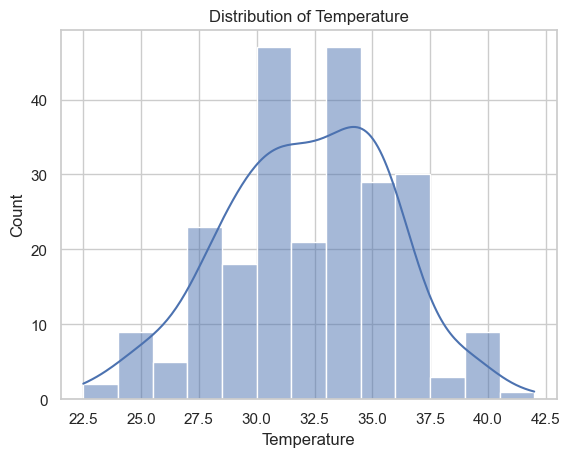

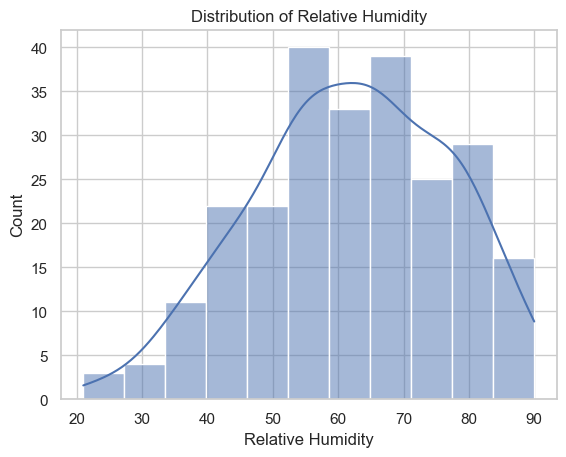

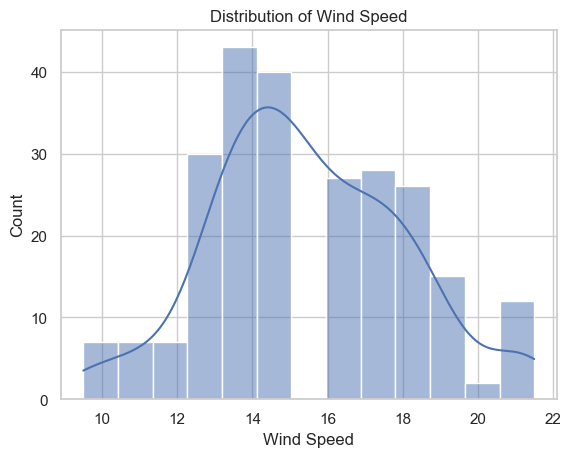

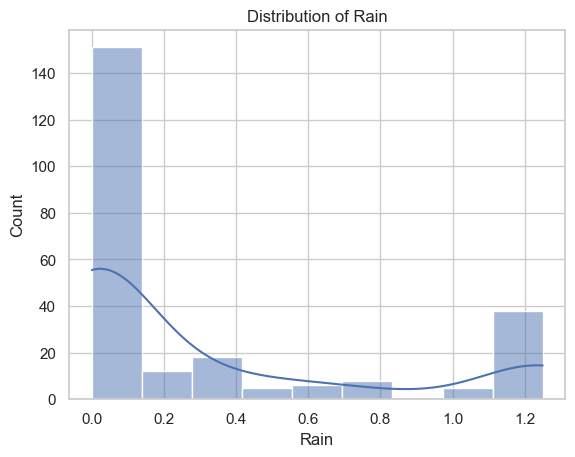

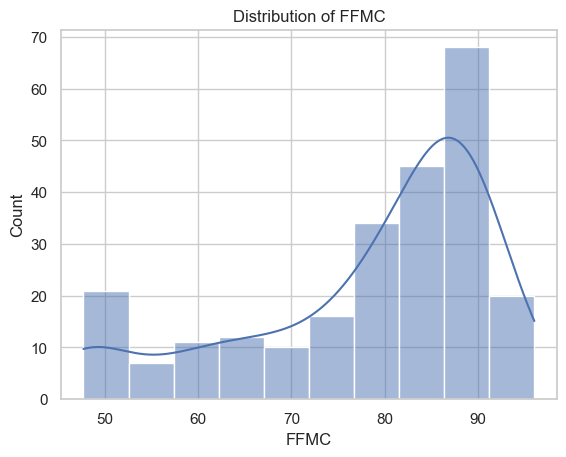

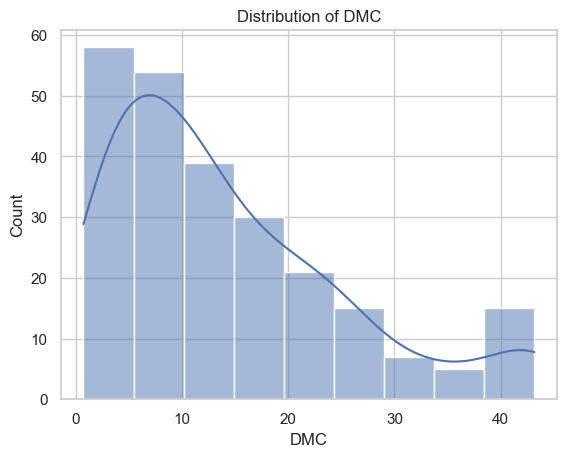

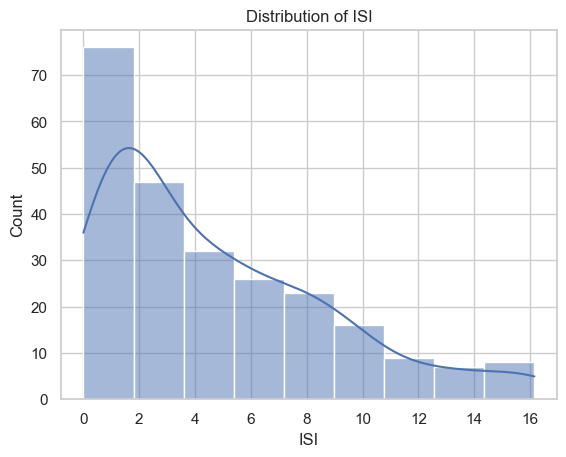

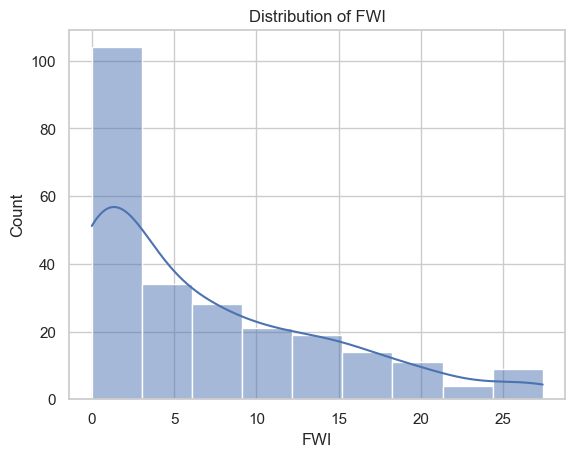

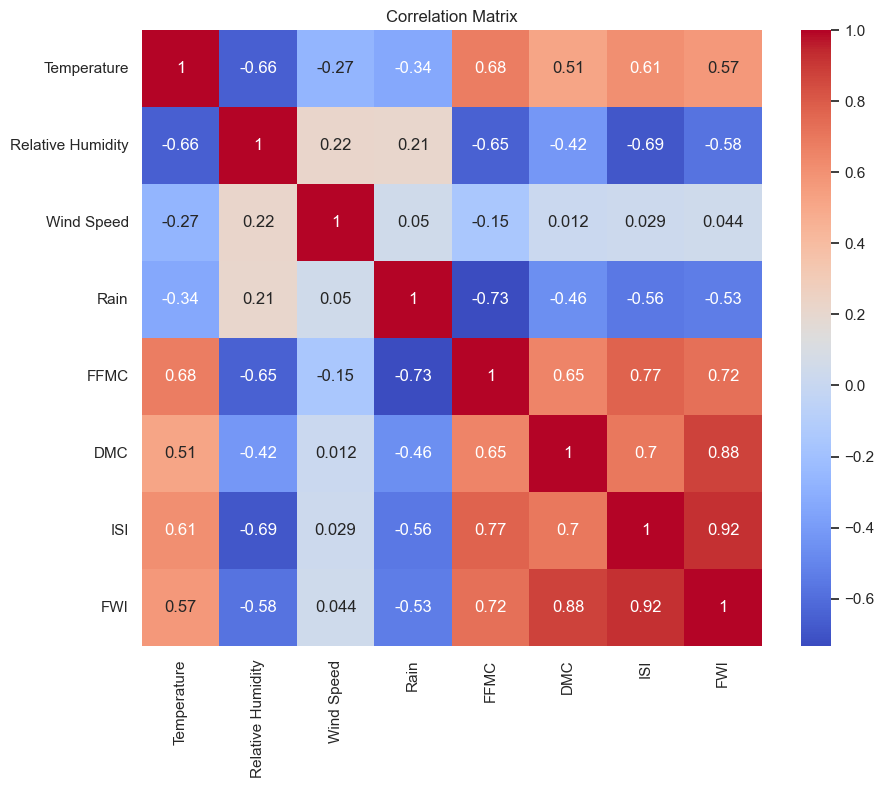

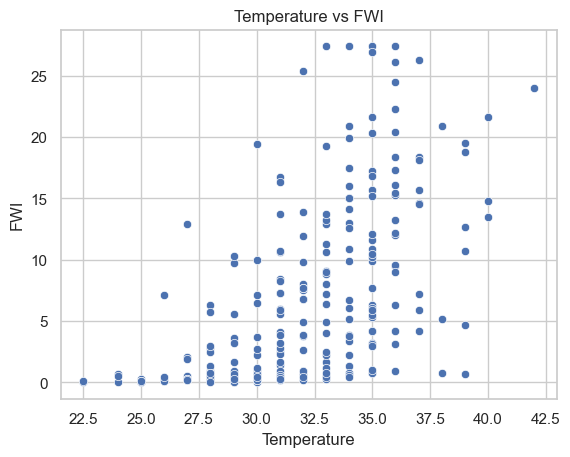

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                244 non-null    int64  
 1   month              244 non-null    int64  
 2   year               244 non-null    int64  
 3   Temperature        244 non-null    float64
 4   Relative Humidity  244 non-null    float64
 5   Wind Speed         244 non-null    float64
 6   Rain               244 non-null    float64
 7   FFMC               244 non-null    float64
 8   DMC                244 non-null    float64
 9   DC                 244 non-null    object 
 10  ISI                244 non-null    float64
 11  BUI                244 non-null    float64
 12  FWI                244 non-null    float64
 13  Classes            243 non-null    object 
 14  Region_encoded     244 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 28.7+ KB
   day  month  y

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid')
if 'df' not in globals():
    loaded = False
    for fname in ['FWI_Dataset.csv', 'cleaned_FWI_Dataset.csv']:
        try:
            df = pd.read_csv(fname)
            print(f"Loaded dataset from {fname}")
            loaded = True
            break
        except FileNotFoundError:
            continue

    if not loaded:
        print(
            "Warning: dataset files not found. Creating a synthetic sample DataFrame for demonstration. "
            "Please provide 'forestfires.csv' or 'cleaned_forest_fires.csv' to use real data."
        )
        np.random.seed(0)
        n = 200
        df = pd.DataFrame({
            'Temperature': np.random.uniform(5, 35, size=n),
            'Relative Humidity': np.random.uniform(10, 100, size=n),
            'Wind Speed': np.random.uniform(0, 20, size=n),
            'Rain': np.random.uniform(0, 10, size=n),
            'FFMC': np.random.uniform(60, 100, size=n),
            'DMC': np.random.uniform(1, 50, size=n),
            'ISI': np.random.uniform(0, 20, size=n),
            'FWI': np.random.uniform(0, 30, size=n),
            'Region': np.random.choice(['North', 'South', 'East', 'West'], size=n)
        })

print(df.isnull().sum())
df.columns = df.columns.str.strip()
rename_map = {}
if 'RH' in df.columns and 'Relative Humidity' not in df.columns:
    rename_map['RH'] = 'Relative Humidity'
if 'Ws' in df.columns and 'Wind Speed' not in df.columns:
    rename_map['Ws'] = 'Wind Speed'
if rename_map:
    df.rename(columns=rename_map, inplace=True)

numerical_cols = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Rain', 'FFMC', 'DMC', 'ISI', 'FWI']
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
        df[col] = df[col].fillna(df[col].median())

if 'Region' in df.columns and df['Region'].isnull().sum() > 0:
    df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

print(df.isnull().sum())

for col in numerical_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

for col in numerical_cols:
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

plt.figure(figsize=(10, 8))
corr_cols = [c for c in numerical_cols if c in df.columns]
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

if {'Temperature', 'FWI'}.issubset(df.columns):
    plt.figure()
    sns.scatterplot(x='Temperature', y='FWI', data=df)
    plt.title('Temperature vs FWI')
    plt.show()

le = LabelEncoder()
if 'Region' in df.columns:
    df['Region_encoded'] = le.fit_transform(df['Region'])
    df.drop('Region', axis=1, inplace=True)

df.info()
print(df.head())

df.to_csv('cleaned_FWI_Dataset.csv', index=False)


MILESTONE - 2

Module-3

In [7]:
import pandas as pd
import numpy as np

target = 'FWI'

numeric_df = df.apply(pd.to_numeric, errors='coerce')

if target not in numeric_df.columns or numeric_df[target].isnull().all():
    raise ValueError(f"Target column '{target}' is not numeric or contains no valid numeric values.")

correlations = numeric_df.corr()[target].abs().sort_values(ascending=False)
print(correlations)

top_features = correlations.index[1:6]
print(list(top_features))

X = numeric_df[top_features]
y = numeric_df[target]

scaler_params = {}
X_scaled = X.copy()

for col in X.columns:
    mean_val = X[col].mean()
    std_val = X[col].std()
    if std_val == 0 or np.isnan(std_val):
        std_val = 1.0
    scaler_params[col] = {'mean': mean_val, 'std': std_val}
    X_scaled[col] = (X[col] - mean_val) / std_val

print(scaler_params)

test_size = 0.2
n_samples = len(X_scaled)
n_test = int(n_samples * test_size)

indices = np.arange(n_samples)
np.random.shuffle(indices)

test_indices = indices[:n_test]
train_indices = indices[n_test:]

X_train = X_scaled.iloc[train_indices]
X_test = X_scaled.iloc[test_indices]
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

print(len(X_train), len(X_test))

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler_params, f)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

FWI                  1.000000
ISI                  0.922941
DMC                  0.877739
BUI                  0.855623
DC                   0.739009
FFMC                 0.722423
Relative Humidity    0.575836
Temperature          0.570230
Rain                 0.533121
day                  0.350713
Region_encoded       0.195407
month                0.083244
Wind Speed           0.044176
year                      NaN
Classes                   NaN
Name: FWI, dtype: float64
['ISI', 'DMC', 'BUI', 'DC', 'FFMC']
{'ISI': {'mean': np.float64(4.74672131147541), 'std': np.float64(4.0919057796664156)}, 'DMC': {'mean': np.float64(14.286065573770491), 'std': np.float64(11.194393460586191)}, 'BUI': {'mean': np.float64(16.664754098360657), 'std': np.float64(14.204823977055081)}, 'DC': {'mean': np.float64(49.430864197530866), 'std': np.float64(47.66560598458993)}, 'FFMC': {'mean': np.float64(78.28811475409836), 'std': np.float64(13.283492963829604)}}
196 48


Module-4

In [8]:
import numpy as np
import pickle

#  Evaluation Metrics 
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

#  Manual Ridge Regression 
class ManualRidge:
    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self, X, y):
        ones = np.ones((X.shape[0], 1))
        X_b = np.hstack((ones, X))
        I = np.eye(X_b.shape[1])
        I[0, 0] = 0
        weights = np.linalg.pinv(X_b.T @ X_b + self.alpha * I) @ X_b.T @ y
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

#  CLEAN NaN VALUES 
train_mask = ~np.isnan(X_train).any(axis=1) & ~np.isnan(y_train)
test_mask = ~np.isnan(X_test).any(axis=1) & ~np.isnan(y_test)

X_train_clean = X_train[train_mask].values
y_train_clean = y_train[train_mask].values
X_test_clean = X_test[test_mask].values
y_test_clean = y_test[test_mask].values

#  Alpha Tuning 
alphas = [0.01, 0.1, 1, 10, 100]
best_alpha = alphas[0]
best_error = float('inf')

for alpha in alphas:
    model = ManualRidge(alpha)
    model.fit(X_train_clean, y_train_clean)
    preds = model.predict(X_test_clean)
    error = mse(y_test_clean, preds)

    if error < best_error:
        best_error = error
        best_alpha = alpha

#  Final Model 
final_model = ManualRidge(best_alpha)
final_model.fit(X_train_clean, y_train_clean)

train_preds = final_model.predict(X_train_clean)
test_preds = final_model.predict(X_test_clean)

print("Best Alpha:", best_alpha)
print("Training MSE:", mse(y_train_clean, train_preds))
print("Training R2:", r2_score(y_train_clean, train_preds))
print("Testing MSE:", mse(y_test_clean, test_preds))
print("Testing R2:", r2_score(y_test_clean, test_preds))

# Save Model 
model_data = {
    "coef_": final_model.coef_,
    "intercept_": final_model.intercept_,
    "alpha": best_alpha
}

with open("ridge.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved as ridge.pkl")


Best Alpha: 0.01
Training MSE: 0.9959393643568382
Training R2: 0.9817324383794405
Testing MSE: 0.9954974921093184
Testing R2: 0.9783534868238185
Model saved as ridge.pkl


MILESTONE - 3

Module-5

MODEL EVALUATION METRICS


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear Regression,0.5498,0.5934,0.9980,0.9976,0.9817,0.9784
1,Ridge Regression,0.5539,0.5950,1.0032,1.0133,0.9815,0.9777
2,Lasso Regression,0.5499,0.5836,0.9996,1.0012,0.9817,0.9782
3,Elastic Net,0.5549,0.5945,1.0036,1.0115,0.9815,0.9778
4,Decision Tree,0.4088,0.9265,0.6003,1.3312,0.9934,0.9615


MAE


,Model,Train MAE,Test MAE
0,Linear Regression,0.5498,0.5934
1,Ridge Regression,0.5539,0.5950
2,Lasso Regression,0.5499,0.5836
3,Elastic Net,0.5549,0.5945
4,Decision Tree,0.4088,0.9265


RMSE


,Model,Train RMSE,Test RMSE
0,Linear Regression,0.9980,0.9976
1,Ridge Regression,1.0032,1.0133
2,Lasso Regression,0.9996,1.0012
3,Elastic Net,1.0036,1.0115
4,Decision Tree,0.6003,1.3312


R²


,Model,Train R2,Test R2
0,Linear Regression,0.9817,0.9784
1,Ridge Regression,0.9815,0.9777
2,Lasso Regression,0.9817,0.9782
3,Elastic Net,0.9815,0.9778
4,Decision Tree,0.9934,0.9615


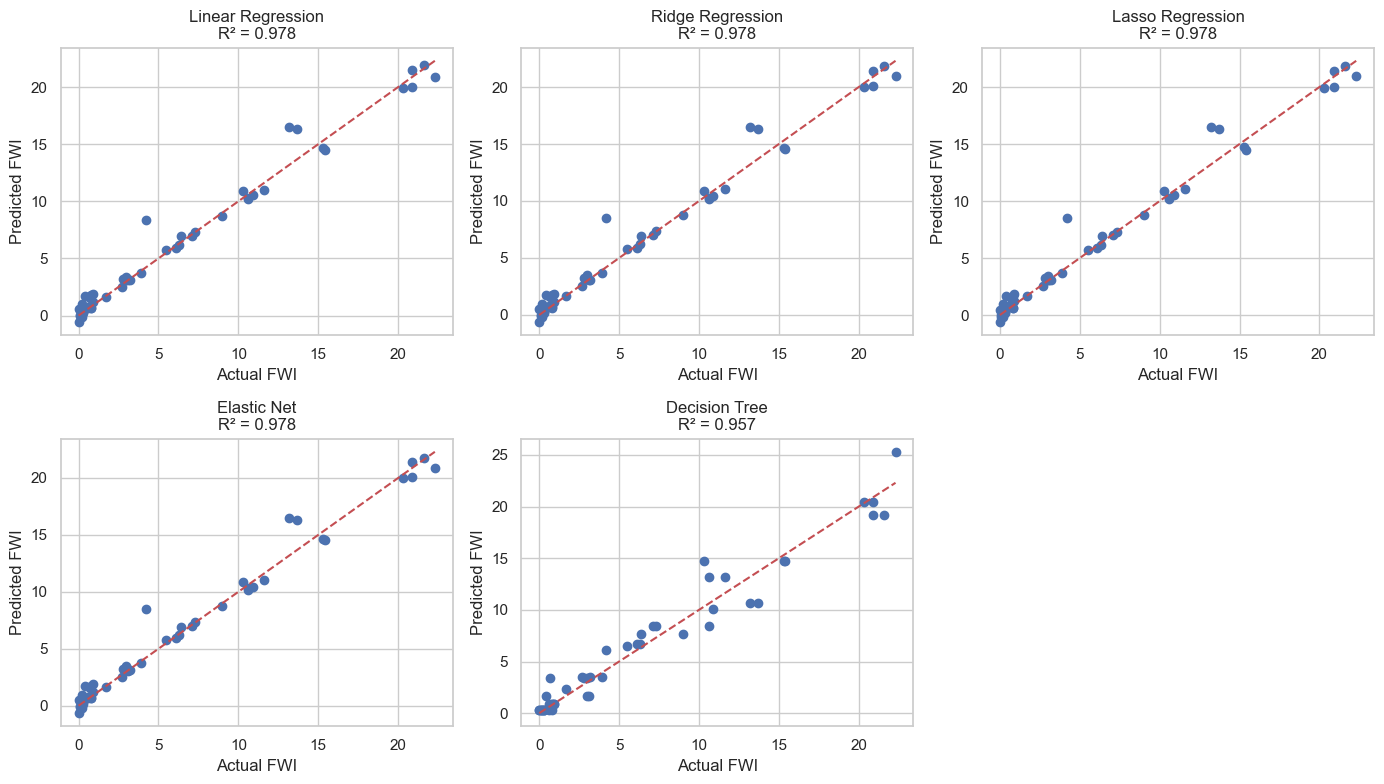

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Evaluation functions
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5)
}

# Compute metrics
results = []

for name, model in models.items():
    model.fit(X_train_clean, y_train_clean)

    train_preds = model.predict(X_train_clean)
    test_preds = model.predict(X_test_clean)

    results.append([
        name,
        mae(y_train_clean, train_preds),
        mae(y_test_clean, test_preds),
        rmse(y_train_clean, train_preds),
        rmse(y_test_clean, test_preds),
        r2_score_manual(y_train_clean, train_preds),
        r2_score_manual(y_test_clean, test_preds)
    ])

# Results 
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Train MAE", "Test MAE",
        "Train RMSE", "Test RMSE",
        "Train R2", "Test R2"
    ]
)

results_df.iloc[:, 1:] = results_df.iloc[:, 1:].round(4)

print("MODEL EVALUATION METRICS")
display(results_df)

print("MAE")
display(results_df[["Model", "Train MAE", "Test MAE"]])

print("RMSE")
display(results_df[["Model", "Train RMSE", "Test RMSE"]])

print("R²")
display(results_df[["Model", "Train R2", "Test R2"]])

# Actual vs Predicted Plots
plt.figure(figsize=(14, 8))
i = 1

for name, model in models.items():
    model.fit(X_train_clean, y_train_clean)
    test_preds = model.predict(X_test_clean)
    test_r2 = r2_score_manual(y_test_clean, test_preds)

    plt.subplot(2, 3, i)
    plt.scatter(y_test_clean, test_preds)
    plt.plot(
        [y_test_clean.min(), y_test_clean.max()],
        [y_test_clean.min(), y_test_clean.max()],
        'r--'
    )
    plt.title(f"{name}\nR² = {test_r2:.3f}")
    plt.xlabel("Actual FWI")
    plt.ylabel("Predicted FWI")
    i += 1

plt.tight_layout()
plt.show()


MILESTONE - 4

Module-6

In [10]:
import os

folders = [
    "templates",
    "static"
]

for folder in folders:
    if not os.path.exists(folder):
        os.makedirs(folder)

print("Flask folder structure created")

Flask folder structure created


In [76]:
%%writefile app.py

from flask import Flask, render_template, request
import pickle
import numpy as np


# 1. Create Flask App

app = Flask(__name__)


# 2. Load Model & Scaler

with open("ridge.pkl", "rb") as f:
    model_data = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

coef = model_data["coef_"]
intercept = model_data["intercept_"]


SCALER_KEYS = list(scaler.keys())
print("SCALER KEYS >>>", SCALER_KEYS)


# 3. Home Route

@app.route("/")
def home():
    return render_template("predict.html")


# 4. Prediction Route

@app.route("/predict", methods=["POST"])
def predict():
    try:
        
        form_values = {
            "Temperature": float(request.form["Temperature"]),
            "RH": float(request.form["RH"]),
            "WS": float(request.form["WS"]),
            "Rain": float(request.form["Rain"]),
            "FFMC": float(request.form["FFMC"]),
            "DMC": float(request.form["DMC"]),
            "DC": float(request.form["DC"]),
            "ISI": float(request.form["ISI"]),
            "BUI": float(request.form["BUI"])
        }

        scaled_values = []
        for key in SCALER_KEYS:
            key_lower = key.lower()

            if "temp" in key_lower:
                value = form_values["Temperature"]
            elif key_lower == "rh":
                value = form_values["RH"]
            elif "ws" in key_lower or "wind" in key_lower:
                value = form_values["WS"]
            elif "rain" in key_lower:
                value = form_values["Rain"]
            elif "ffmc" in key_lower:
                value = form_values["FFMC"]
            elif "dmc" in key_lower:
                value = form_values["DMC"]
            elif key_lower == "dc":
                value = form_values["DC"]
            elif "isi" in key_lower:
                value = form_values["ISI"]
            elif "bui" in key_lower:
                value = form_values["BUI"]
            else:
                raise Exception(f"Unknown scaler key: {key}")

            mean = scaler[key]["mean"]
            std = scaler[key]["std"]
            scaled_values.append((value - mean) / std)

        X = np.array(scaled_values)
        prediction = np.dot(X, coef) + intercept

        return render_template(
            "result.html",
            prediction=round(float(prediction), 2)
        )

    except Exception as e:
        return f"Error: {e}"
# 5. Run Flask App
if __name__ == "__main__":
    app.run(debug=True)


Overwriting app.py


In [69]:
%%writefile templates/base.html

<!DOCTYPE html>
<html>
<head>
    <title>FWI Prediction App</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
</head>
<body>

<div class="topbar">
    <div class="app-title">FWI Prediction App</div>
    <div class="home-link">Home</div>
</div>

<div class="main">
    {% block content %}{% endblock %}
</div>

</body>
</html>


Overwriting templates/base.html


In [75]:
%%writefile templates/index.html

{% extends "base.html" %}
{% block content %}

<div class="card">
    <h1>Fire Weather Index Prediction System</h1>
    <p>
        The <b>Fire Weather Index (FWI)</b> is a numerical rating that indicates
        the intensity of fire danger based on weather conditions.
    </p>

    <p>
        This project uses <b>Machine Learning (Ridge Regression)</b> to predict
        fire risk by analyzing environmental factors such as temperature,
        humidity, wind speed, and rainfall.
    </p>

    <a class="btn" href="/start">🚀 Start Prediction</a>
</div>

{% endblock %}


Overwriting templates/index.html


In [77]:
%%writefile templates/predict.html

{% extends "base.html" %}
{% block content %}

<div class="card">
    <h2>Forest Fire Weather Index (FWI) Prediction</h2>

    <!-- Added sentence -->
    <p class="desc">
        Enter the fire weather Index parameters below to get the predicted FWI.
    </p>

    <form action="/predict" method="post">

        <div class="field">
            <label>Temperature</label>
            <input type="number" step="any" name="Temperature" required>
        </div>

        <div class="field">
            <label>Relative Humidity (RH)</label>
            <input type="number" step="any" name="RH" required>
        </div>

        <div class="field">
            <label>Wind Speed (WS)</label>
            <input type="number" step="any" name="WS" required>
        </div>

        <div class="field">
            <label>Rain</label>
            <input type="number" step="any" name="Rain" required>
        </div>

        <div class="field">
            <label>FFMC</label>
            <input type="number" step="any" name="FFMC" required>
        </div>

        <div class="field">
            <label>DMC</label>
            <input type="number" step="any" name="DMC" required>
        </div>

        <div class="field">
            <label>DC</label>
            <input type="number" step="any" name="DC" required>
        </div>

        <div class="field">
            <label>ISI</label>
            <input type="number" step="any" name="ISI" required>
        </div>

        <div class="field">
            <label>BUI</label>
            <input type="number" step="any" name="BUI" required>
        </div>

        <button type="submit">Predict FWI</button>

    </form>
</div>

{% endblock %}


Overwriting templates/predict.html


In [73]:
%%writefile templates/result.html

{% extends "base.html" %}
{% block content %}

<div class="card">
    <h2>FWI Prediction Result</h2>

    <p class="desc">The predicted Fire Weather Index (FWI) is:</p>

    <div class="value">{{ prediction }}</div>

    <p class="success">FWI prediction successful!</p>

    <a href="/">
        <button class="back-btn">Go Back</button>
    </a>
</div>

{% endblock %}


Overwriting templates/result.html


In [74]:
%%writefile static/style.css

/* ===== IMPORT FONT ===== */
@import url('https://fonts.googleapis.com/css2?family=Inter:wght@400;500;600&display=swap');

/* ===== BODY ===== */
body {
    margin: 0;
    font-family: 'Inter', sans-serif;
    background: url("/static/bg.png") no-repeat center center fixed;
    background-size: cover;
}

/* ===== TOP BAR ===== */
.topbar {
    background: rgba(227, 237, 249, 0.9);
    padding: 12px 20px;
    display: flex;
    justify-content: space-between;
    align-items: center;
    backdrop-filter: blur(6px);
}

.app-title {
    font-size: 16px;
    font-weight: 600;
    color: #1f2937;
}

.home-link {
    font-size: 14px;
    color: #1f2937;
}

/* ===== MAIN LAYOUT ===== */
.main {
    display: flex;
    justify-content: center;
    margin-top: 60px;
}

/* ===== CARD (GLASS EFFECT) ===== */
.card {
    background: rgba(255, 255, 255, 0.92);
    width: 420px;
    padding: 30px;
    border-radius: 8px;
    box-shadow: 0 8px 24px rgba(0,0,0,0.25);
    text-align: center;
}

/* ===== HEADINGS ===== */
h2 {
    color: #1f2937;
    font-weight: 600;
    margin-bottom: 8px;
}

/* ===== DESCRIPTION TEXT ===== */
.desc {
    font-size: 13px;
    color: #4b5563;
    margin-bottom: 22px;
}

/* ===== FORM ===== */
.field {
    text-align: left;
    margin-bottom: 12px;
}

label {
    font-size: 13px;
    font-weight: 500;
    color: #374151;
}

input {
    width: 100%;
    padding: 7px;
    margin-top: 4px;
    border: 1px solid #d1d5db;
    border-radius: 4px;
    font-family: 'Inter', sans-serif;
}

/* ===== BUTTON ===== */
button {
    margin-top: 18px;
    width: 100%;
    padding: 10px;
    background: linear-gradient(135deg, #2563eb, #3b82f6);
    color: white;
    border: none;
    border-radius: 4px;
    font-size: 14px;
    font-weight: 500;
    cursor: pointer;
}

/* ===== RESULT ===== */
.value {
    font-size: 28px;
    font-weight: 600;
    color: #16a34a;
    margin: 14px 0;
}

.success {
    font-size: 13px;
    color: #4b5563;
}

.back-btn {
    width: auto;
    padding: 8px 20px;
}



Overwriting static/style.css
